### Linear Regression Tutorial-III

----------------------------------------------------------------
Author: Dr. Sampath Lonka

Date: August 14, 2022

Key Text: *Aurélien Géron*, `Hands-On Machine Learning with Scikit-Learn, Keras, and
TensorFlow`, O'Reilly Media, 2019

----------------------------------------------------------------

In this tutorial, we discuss the following topics:

1. **Variants of Gradient Descent**  
2. **Polynomial Regression**
3. **Regularization**
   - Lasso Regression 
   - Rigde Regression  
   - Elastic Net 
   - Early Stopping    

In [7]:
import numpy as np 

X = 2* np.random.rand(100,1)
y = 4 +3 * X + np.random.randn(100,1) 

In [8]:
#add x0=1 to each observation
X_aug = np.c_[np.ones((100,1)),X] # column stack
theta_hat = np.linalg.inv(X_aug.T@X_aug) @ X_aug.T @y
theta_hat

array([[3.62096301],
       [3.34445692]])

We would have hoped for $\theta_0=4$ and $\theta_1=3$ instead, we have $\theta_0=3.93142395$ and $\theta_1=3.11416021.$ These values are close enough, but the noise made it impossible to recover the exact parameters of the original function.

In [9]:
X_test = np.array([[0],[2]])
X_test_aug = np.c_[np.ones((2,1)),X_test]
y_predict = X_test_aug @ theta_hat
y_predict

array([[ 3.62096301],
       [10.30987685]])

In [10]:
X_test_aug

array([[1., 0.],
       [1., 2.]])

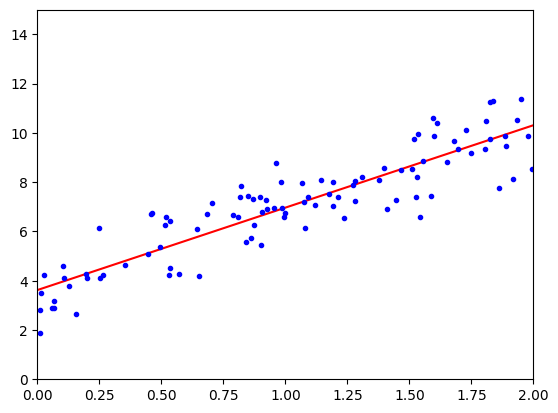

In [11]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
model.intercept_,  model.coef_


(array([3.62096301]), array([[3.34445692]]))

In [13]:
model.score(X,y)

0.8100847671309048

In [14]:
model.predict(X_test)

array([[ 3.62096301],
       [10.30987685]])

In [15]:
theta_hat_svd, residuals, rank, s = np.linalg.lstsq(X_aug,y,rcond=1e-6)
theta_hat_svd

array([[3.62096301],
       [3.34445692]])

In [16]:
residuals

array([88.16080545])

In [17]:
rank

2

In [18]:
s

array([14.98791759,  3.86862117])

In [19]:
np.linalg.pinv(X_aug)@y

array([[3.62096301],
       [3.34445692]])

### Beyond Gradient Descent 

- Batch Gradient Descent 
- Stochastic Gradient Descent 
- Minibatch Gradient Descent

Note that the gradient of the loss function w.r.t. the $\theta$ is
$$\nabla_\theta \mathcal{L}(\theta) ={2\over m}X^T(X\theta-y) $$
the graditent Descent step is  
$$\theta_{next} = \theta - \eta \nabla_\theta\mathcal{L}(\theta)

In [20]:
#implementation

def gradient_descent(X,y,lr=0.1, n_iter=1000):
    m,n = np.shape(X)
    X_aug = np.c_[np.ones((m,1)),X]
    """
    eta = 0.1 #lr
    n_iter = 1000 #number of iterations
    m = 100 #number of samples
    """
    theta = np.random.randn(n+1,1) #random starting
    #print(f"Shape of theta {np.shape(theta)}")
    theta_hist = []
    for iteration in range(n_iter):
        grad = 2/m * X_aug.T @ (X_aug @ theta - y)
        theta = theta - lr * grad
        theta_hist.append(theta) 
    return theta, theta_hist  

In [21]:
theta, theta_hist= gradient_descent(X,y,0.05,10000)
theta

array([[3.62096301],
       [3.34445692]])

That's what we have seen using the normal equations in the linear regression.

In [22]:
theta_hist[:10]

[array([[1.45833413],
        [0.50680709]]),
 array([[1.96672905],
        [1.12559366]]),
 array([[2.36058128],
        [1.60565668]]),
 array([[2.66562648],
        [1.9781545 ]]),
 array([[2.90181904],
        [2.26724619]]),
 array([[3.08463075],
        [2.49166387]]),
 array([[3.22605782],
        [2.66593176]]),
 array([[3.33540154],
        [2.80131145]]),
 array([[3.41987375],
        [2.90653483]]),
 array([[3.48506613],
        [2.98837232]])]

In [23]:
X_test = np.array([[0],[2]])
X_test_aug = np.c_[np.ones((2,1)),X_test]
y_predict = X_test_aug @ theta_hist[0]
y_predict

array([[1.45833413],
       [2.4719483 ]])

In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_simple_lr(X,y,lr,k=10):
    plt.plot(X,y,"b.")
    theta, theta_hist = gradient_descent(X,y,lr=lr)
    y_predict_theta = X_test_aug @ theta
    plt.plot(X_test,y_predict_theta,'g-')
    for i in range(len(theta_hist[:k])):
        predict = X_test_aug @ theta_hist[i]
        plt.plot(X_test, predict,"r-")
    plt.axis([0,2,0,15])
    plt.title(f"Gradient Descent with $\eta={lr}$")
    plt.show()


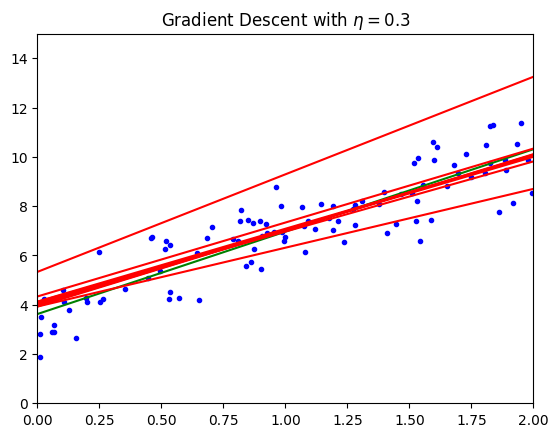

In [26]:
plot_simple_lr(X,y,0.3,k=10)


#### Stochastic Gradient Descent

In [27]:
n_epochs = 50 
t0, t1 = 5, 50 #schedule hyperparameters

def lr_schedule(t):
    return t0/(t+t1) 

m,n = np.shape(X)

theta = np.random.randn(n+1,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        rand_idx = np.random.randint(m) 
        xi = X_aug[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        grads = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = lr_schedule(epoch*m+i)
        theta = theta - eta*grads  

In [28]:
theta

array([[3.61454912],
       [3.38484199]])

In [29]:
def stochastic_gradient(X,y,n_epochs=50,t0=5,t1=50):
    """_summary_
    n_epochs = 50 
    t0, t1 = 5, 50 #schedule hyperparameters

    Args:
        X (_type_): _description_
        y (_type_): _description_
        n_epochs (int, optional): _description_. Defaults to 50.
        t0 (int, optional): _description_. Defaults to 5.
        t1 (int, optional): _description_. Defaults to 50.

    Returns:
        _type_: _description_
    """
    
    def lr_schedular(t):
        return t0/(t+t1) 

    m,n = np.shape(X)
    X_aug = np.c_[np.ones((m,1)),X]
    theta = np.random.randn(n+1,1) #random initialization
    theta_list = []
    for epoch in range(n_epochs):
        for i in range(m):
            rand_idx = np.random.randint(m) 
            xi = X_aug[rand_idx:rand_idx+1]
            yi = y[rand_idx:rand_idx+1]
            grads = 2 * xi.T.dot(xi.dot(theta)-yi)
            eta = lr_schedular(epoch*m+i)
            theta = theta - eta*grads 
            theta_list.append(theta) 
    return theta, theta_list

In [30]:
theta,_= stochastic_gradient(X,y)

In [31]:
theta

array([[3.63729955],
       [3.35896786]])

In [61]:
def plot_simple_lr(X,y,epochs=50,k=10):
    plt.plot(X,y,"b.")
    theta, theta_hist = stochastic_gradient(X,y,epochs)
    y_predict_theta = X_test_aug @ theta
    plt.plot(X_test,y_predict_theta,'g-')
    for i in range(len(theta_hist[:k])):
        predict = X_test_aug @ theta_hist[i]
        plt.plot(X_test, predict,"r-")
    plt.axis([0,2,0,15])
    plt.title(f"Gradient Descent with Stochastic Gradient with epochs ={epochs}")
    plt.show()


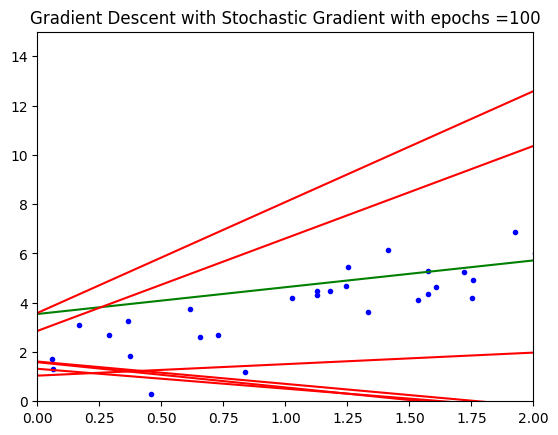

In [62]:
plot_simple_lr(X,y,100,k=6)

Use `SGDRegressor` class to perform Linear Regression using Stochastic GD with Scikit-Learn.

In [63]:
from sklearn.linear_model import SGDRegressor  
sgd_model = SGDRegressor(max_iter = 1000, tol=1e-3, penalty="l2",eta0=0.1)
sgd_model.fit(X,y)

c:\Users\Sampath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1)

In [64]:
sgd_model.intercept_, sgd_model.coef_

(array([3.59566833]), array([0.92470799]))

In [65]:
sgd_model.score(X,y)

0.554648392606879

### Polynomial Regression

In [122]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [123]:
m = 100 
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

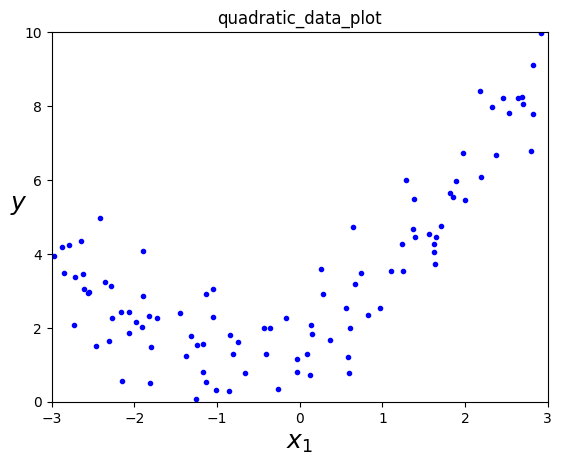

In [124]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic_data_plot")
plt.show()

In [125]:
#for polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) 
X[0]

array([-0.75275929])

In [126]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [127]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

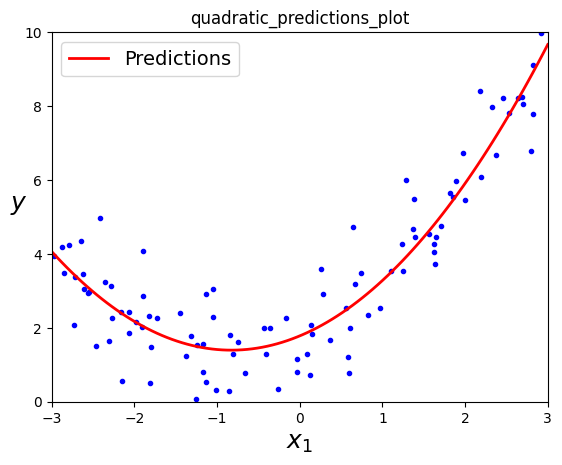

In [128]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic_predictions_plot")
plt.show()

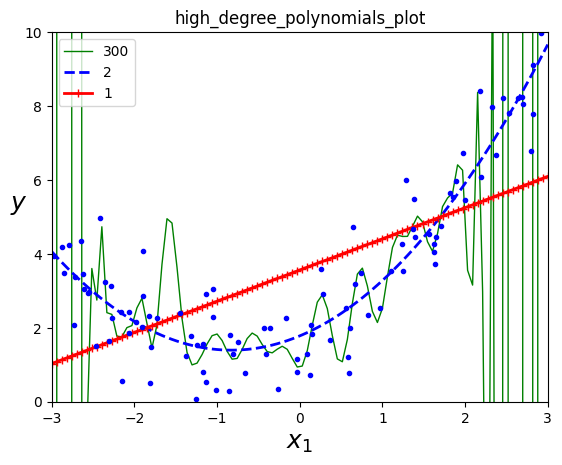

In [129]:
#this chunk of code taken directly from keytext book without modifications 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("high_degree_polynomials_plot")
plt.show()

**Learning Curves**: Learning curves are plots of the
model’s performance on the training set and the validation set as a function
of the training set size (or the training iteration). To generate the plots, train
the model several times on different sized subsets of the training set.

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [102]:
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors = [], [] 
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m]) 
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train_errors")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3,label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

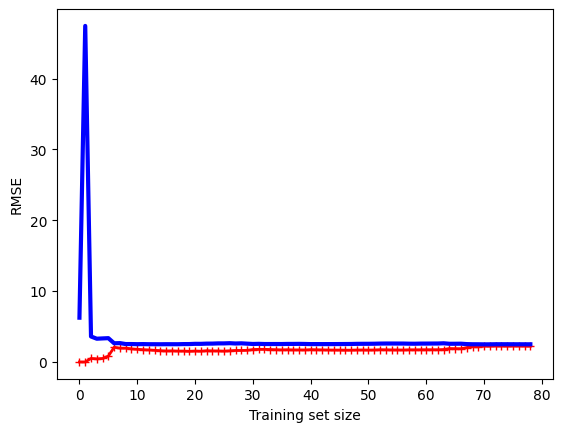

In [103]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [104]:
lin_reg.score(X,y)

0.8721893529905793

In [105]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features",
                                 PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg",LinearRegression())
])

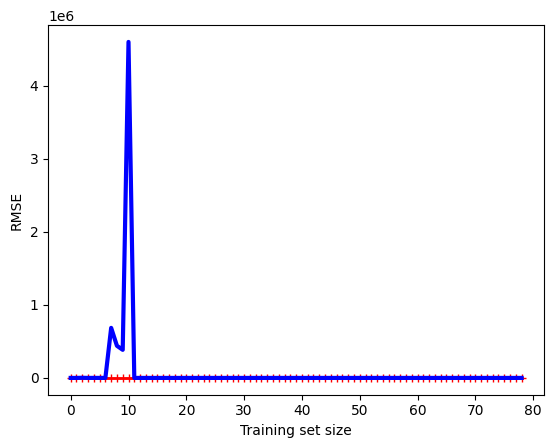

In [106]:
plot_learning_curves(polynomial_regression,X,y)

### Regularization for Linear Models for Regression

To reduce overfitting for a linear model, we constrain the weights, that is add regularization term to the model. For instance, in the case of a polynomial model, we regularize it by reducing the number of polynomial degrees. 

In this section we discuss three different models to overcome the  overfitting, namely:
- Ridge Regression
- Lasso Regression 
- Elastic Net  

#### Ridge Regression
- Ridge Regression is a regularized version of Linear Regression
- The regularized term we add to the loass function is  
  $$\lambda\sum_{i=1}^k w_i^2$$
- It forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
- Note that the regularization term should only be added to the cost function during training. After training the model, to evaluate the model, we use the unregularized performance measure.
- The hyperparameter (`reguarized parameter`) $\lambda$ is controls how much you want to regularize the model. 
- If $\lambda=0,$ then Ridge regression is just Linear Regression.
- If $\lambda$ is very large, then all weights end up very close to zero and the result is flat line going though the data's mean.
- The loss function for Ridge regression is given below:
  $$\widetilde{\mathcal{L}}({\bf w};{\bf x},y) =\mathcal{L}({\bf w};{\bf x},y) + {\lambda\over 2}\|{\bf w}\|^2$$
  where $\mathcal{L}(w;{\bf x},y)=\|y-\hat{y}\|^2.$
- By using least squares techniques, the loss function for Ridge regression is minimum at  
  $$\hat{\bf w} = ({\bf X}^T{\bf X}+\lambda I)^{-1}{\bf X}^Ty$$

In [48]:
from sklearn.linear_model import Ridge  
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_model = ridge_reg.fit(X,y)
ridge_model.predict([[1.5]]) 

array([[5.10065312]])

In [49]:
ridge_model.score(X,y)

0.5650850924044117

Using Stochastic Gradient Descent:

In [50]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel()) 
sgd_reg.predict([[1.5]])

array([5.06132426])

In [51]:
sgd_reg.score(X,y)

0.5649178300104483

- The `penalty` hyperparameter sets the type of regularization term to use. 
- Specifying the `penalty=l2` indicating that you want SGD to add a $\ell_2$ regularization term to the cost function.

#### Lasso Regression 
- **Least Absolute Shrinkage and Selection Operator** (Lasso) Regression  is another version of Linear Regression.
- We add $\ell_1$ regularization term to the loass function instead of $\ell_2$ norm. 
- The loass function in Lasso Regression is given below. 
  $$\widetilde{\mathcal{L}}({\bf w};{\bf x},y) =\mathcal{L}({\bf w};{\bf x},y) + {\lambda\over 2}\|{\bf w}\|_1$$
  where $\|{\bf w}\|_1=\displaystyle\sum_{i=1}^k|w_i|.$
- In the Lasso regression, the model tends to eliminate the weights of the least important features. In other words, the Lasso regression automatically performs feature selection and outputs a sparse model (i.e, with few nonzero feature weights).
- The loss function in Lasso regression is not differentiable at $w_i=0,\ i=1,\ldots,k,$ but Gradient Descent still performs if you use a subgradient technique.
- The gradient of the loss function in Lasso regression is given below:
$$\nabla_{\bf w}\widetilde{\mathcal{L}}({\bf w};{\bf x},y) =\nabla_{\bf w}\mathcal{L}({\bf w};{\bf x},y) +{\lambda\over 2}\nabla_{\bf w} \|{\bf w}\|_1,$$
where $$\nabla_{\bf w} \|{\bf w}\|_1=\begin{bmatrix}
                                      sign(w_1)\\
                                      sign(w_2)\\
                                      \vdots\\
                                      sign(w_k)
                                      \end{bmatrix}$$
and $$sign(w_i)=\left\{\begin{array}{l c}\\
                      -1 & if\ w_i<0\\
                      0 & if\ w_i=0\\
                      1 & if\ w_i>0\\
                      \end{array}\right.   $$

In [52]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y) 
lasso_reg.predict([[1.5]])

array([5.04699578])

In [53]:
lasso_reg.score(X,y)

0.5645094882157327

### Elastic Net 

- The regularization term consists of both $\ell_1$ and $\ell_2$ norms.
- In general Rigde is good regularization, but if you suspect only a few features are useful, then you can choose one of Lasso or Elastic Net.
- In general, Elastic Net is preferred over Lasso because Lasso may
behave *erratically* when the number of features is greater than the number of
training instances or when several features are strongly correlated. 
- The loss function is defined as
$$\tilde{\mathcal{L}}(w; {\bf x, y})=\mathcal{L}(w; {\bf x, y})
+r\alpha \sum_{i=1}^k|w_i| +{1-r\over 2}\alpha \sum_{i=1}^kw_i^2$$
- When $r = 0,$ Elastic Net is equivalent to Ridge Regression, and when
$r = 1,$ it is equivalent to Lasso Regression.

In [130]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

In [131]:
elastic_net.score(X,y)

0.4255128056613444

### Early Stopping

- In Gradient Descent, we stop training as soon as the validation error reaches minimum.
- In training GD, after some training, the validation error stop decreasing and strat to go back up.
- This indicates that the model has started to overfit the training data.
- To avoid overfitting, we use *early stopping* technique.
- With early stopping we just stop training as soon as the validation error reaches the minimum. 

In [133]:
#implementation of early-stopping
from sklearn.base import clone
# prepare the data
poly_scaler = Pipeline([("poly_features",
                        PolynomialFeatures(degree=90,
                                           include_bias=False)),
                        ("std_scaler", StandardScaler())
                        ])

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [139]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005)

In [140]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

In [142]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [147]:
minimum_val_error

29245241.95915358